# Logistic Regression - Statistical View

We have seen how K-NN allows to perform classification in a **non-parametric way**. However, it has some short-comings:
- It doesn't work with many features;
- It requires memorization of the training set;
- Each classification requires a search of the K-nearest neighbors in the training set.

Compare this to a parametric predictive model such as the linear regression:

$$f(\mathbf{x}) = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

Parametric models are fast and compact - once we train them, we don't need to save the training data and they can be used to classify new examples in a very natural way.

While linear regression is a powerful parametric models, it allows to model relationships between **continuous independent and dependent variables** and **between qualitative independent variables and continuous variables**. However, it does not allow to model relationships between continuous or qualitative independent variables and **qualitative dependent variables**.

## Example Data
Establishing such relationships is useful in different contexts. For instance, let us consider the [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) dataset:

In [2]:
from ucimlrepo import fetch_ucirepo 
from matplotlib import pyplot as plt
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

data = X.join(y)
data

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


The dataset contains several measurements of given quantities measured from digitized image of a fine needle aspirate (FNA) of a breast mass, together with a categorical variable `Diagnosis` with two levels: `M` (malignant) and `B` (benign).

In this case, it would be good to be able to study whether a relationship exists between some of the considered independent variables and the dependent variable or simply to classify an example in one of the two classes from new observation.

We will consider the `radius1` variable for the moment. Let us plot this variable with respect to `Diagnosis`:

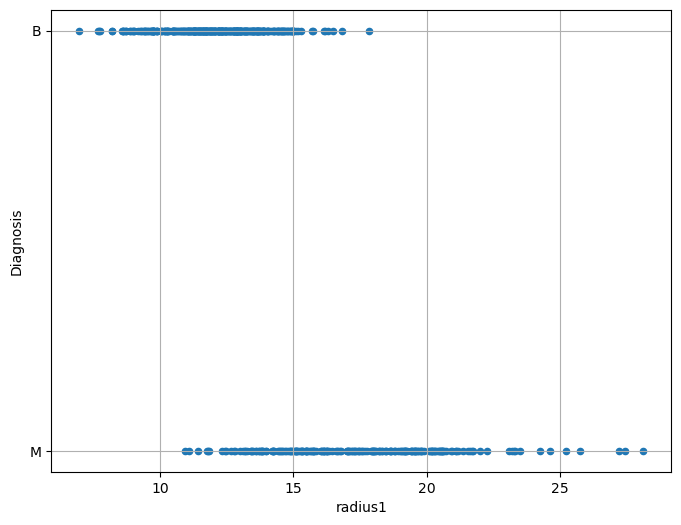

In [3]:
data.plot.scatter(x='radius1',y='Diagnosis', figsize=(8,6))
plt.grid()
plt.show()

From the plot above, we can note that there is some form of relationship between the two variables. Indeed:
* For low values of `radius1`, we tend to have more benign cases;
* For large values of `radius1`, we tend to have more malignant cases.

## Limits of Linear Regression
Of course, we would like to quantify this relationship in a more formal way.
**As in the case of a linear regressor, we want to define a model which can predict the independent variable $y$ from the dependent variables $x_i$. If such model gives good predictions, than we can trust its interpretation as a means of studying the relationship between the variables.**

We can think of converting `B => 1` and `M => 0`, and then compute a linear regressor:

$$Diagnosis = \beta_0 + \beta_1 radius1$$

This would be the result:

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_63863/3386663047.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Diagnosis']=data['Diagnosis'].replace({'B':0,'M':1})


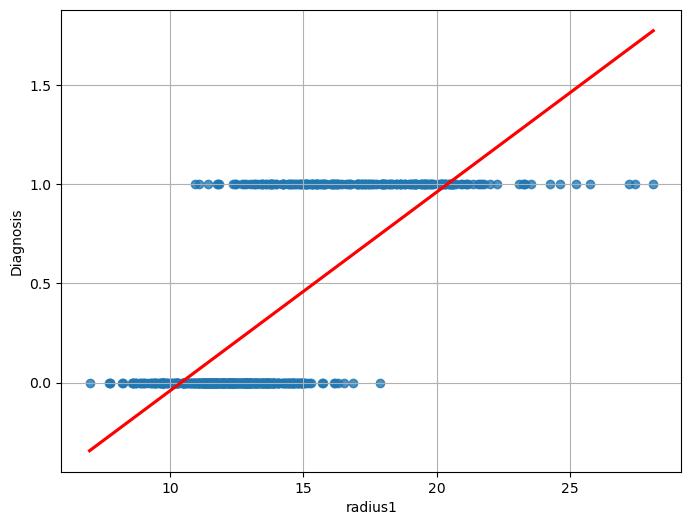

In [4]:
import seaborn as sns
data['Diagnosis']=data['Diagnosis'].replace({'B':0,'M':1})
plt.figure(figsize=(8,6))
sns.regplot(x=data['radius1'],y=data['Diagnosis'], ci=None, line_kws={'color':'red'})
plt.grid()
plt.show()

We can immediately see that this function does not model the relationship between the two variables very well. While we obtain a statistically relevant regressor with $R^2=0.533$ and statistically relevant coefficients, the residual plot will look like this:

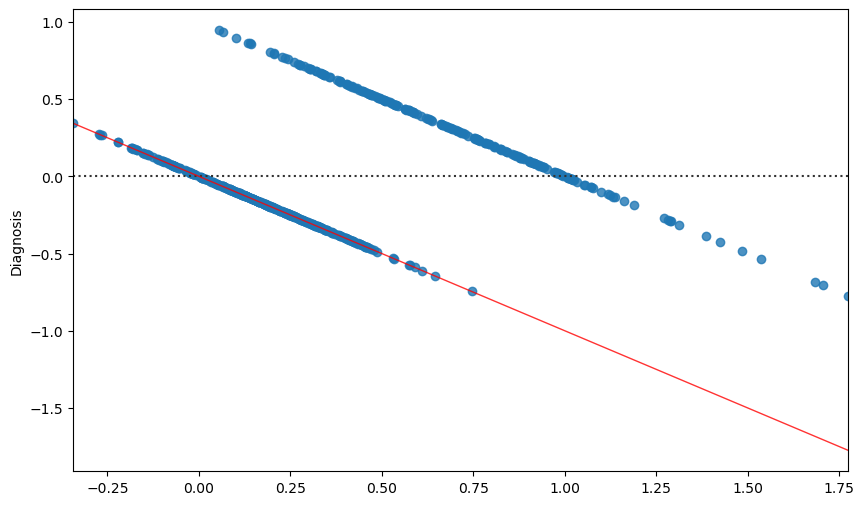

In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
#ols("Diagnosis ~ radius1", data).fit().summary()
fitted=ols("Diagnosis ~ radius1", data).fit().fittedvalues
plt.figure(figsize=(10,6))
sns.residplot(x=fitted, y='Diagnosis', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()

The correlation between the residuals and the independent variable is a strong indication that the true relationship between the two variables is not correctly modeled. After all, from a purely predictive point of view, we are using a linear regressor which takes the form:

$$f:\mathbb{R} \to \mathbb{R}$$

while the values `Diagnosis` variable belong to the set $\{0,1\}$ and we would need instead a function with the following form:

$$f:\mathbb{R} \to \{0,1\}$$

However, the linear regressor cannot directly predict **discrete values**. 

**In practice, while with a linear regressor we wanted to predict continuous values, now we want to assign observations $\mathbf{x}$ to discrete bins (in this case only two possible ones). As we will better study later in the course, this problem is known as classification.**

## From Binary Values to Probabilities
If we want to model some form of continuous value, we could think to transition from $\{0,1\}$ to $[0,1]$ using probabilities, which is a way to turn discretized values to "soft" values indicating our belief in the fact that `Diagnosis` will take either a $0$ or $1$ value. We could hence think to model the following probability, rather than modeling `Diagnosis` directly:

$$P(Diagnosis=1| radius1)$$

Note that modeling that probability directly is what **discriminative models do**.

However, even in this case, a model of the form:

$$P(Diagnosis=1|radius1) = \beta_0 + \beta_1 radius1$$

Would not be appropriate. Indeed, while $P(Diagnosis=1| radius1)$ needs to be in the $[0,1]$ range, the linear combination $\beta_0 + \beta_1 radius1$ will naturally output values **smaller than $0$** and **larger than $1$**. How should we interpret such values?

Intuitively, we would expect to $P(Diagnosis=1| radius1)$ to assume values in the $[0,1]$ range for intermediate values (say `radius` $\in [10,20]$), while for extremely low values of (say `radius` $<10$) the probability **should saturate to $0$** and for extremely large values (say `radius` $>20$) the probability should saturate to 1.

When `radius1` takes large values (say larger than $20$), we expect **probability to saturate to $1$**.

In practice, we would expect a result similar to the following:

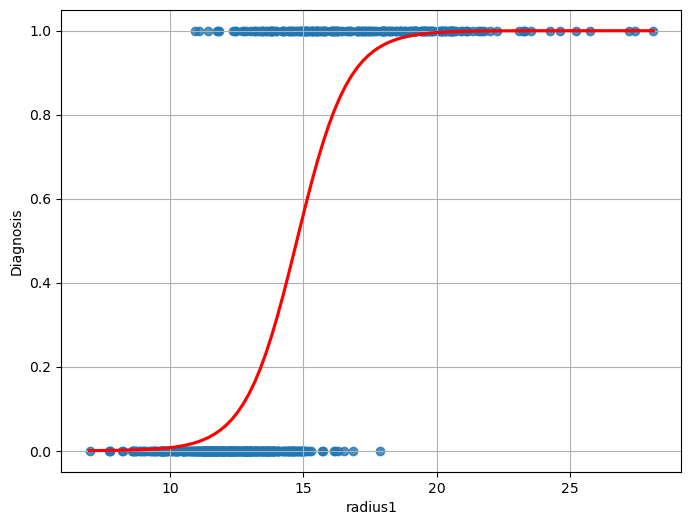

In [6]:
plt.figure(figsize=(8,6))
sns.regplot(x=data['radius1'],y=data['Diagnosis'], logistic=True, ci=None, line_kws={'color':'red'})
plt.grid()
plt.show()

As can be noted, the function above is not linear, and hence it cannot be fit with a linear regressor. However, we have seen that a linear regressor can be tweaked to also represent nonlinear functions.

## The Logistic Function
We need to find a **transformation of the formulation of the linear regressor to transform its output into a nonlinear function of the independent variables**. Of course, we do not want *any* transformation, but one that has the previously highlighted properties. 

In practice the **logistic function has some nice properties that, as we will se in a moment, allow to easily interpret the resulting model in a probabilistic way**. The logistic function is defined as:

$$f(x) = \frac{1}{1+e^{-x}}$$

and has the following shape:

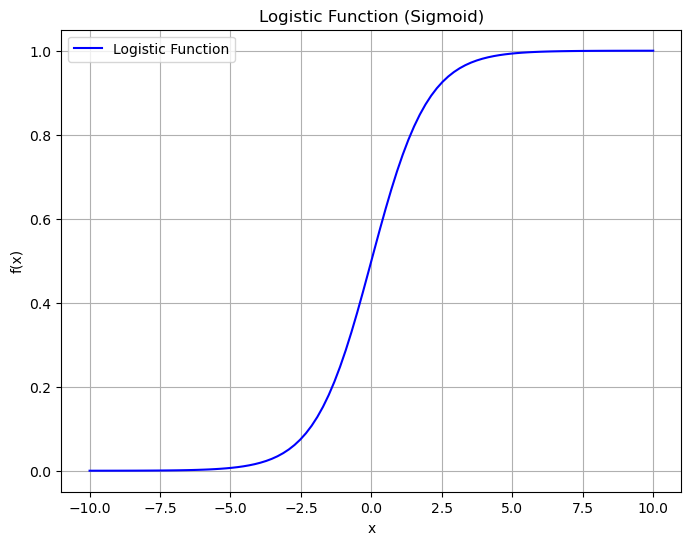

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic (sigmoid) function
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 100)  # Creating 100 evenly spaced values from -6 to 6

# Calculate y values using the logistic function
y = logistic_function(x)

# Plot the logistic function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Logistic Function', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Logistic Function (Sigmoid)')
plt.grid()
plt.legend()
plt.show()


As we can see, the function has the properties we need:
* Its values are comprised between $0$ and $1$;
* It saturates to $0$ and $1$ for extreme values of $x$.

Additionally, it is differentiable, which will be useful for optimization later.

## The Logistic Regression Model
In practice, we define our model, **the logistic regressor model** as follows (**simple logistic regression**):

$$P(Diagnosis=1|X) = f(\beta_0 + \beta_1 X) = \frac{1}{1+e^{-(\beta_0 + \beta_1 X)}}$$

Or, more in general (**multiple logistic regression**):

$$P(y=1|\mathbf{x}) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n)}}$$

It is easy to see that:

$$p=\frac{1}{1+e^{-x}} \Rightarrow p+pe^{-x} = 1 \Rightarrow pe^{-x} = 1-p \Rightarrow e^{-x} = \frac{1-p}{p} \Rightarrow e^{x} = \frac{p}{1-p}$$

Hence:

$$e^{\beta_0+\beta_1x_1 + \ldots + \beta_nx_n} = \frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})}$$

The term on the right is called the odd of $P(y=1|\mathbf{x})$. 

The odd of $P(y=1|\mathbf{x})$ is the number of times we believe the example will be positive (observed $\mathbf{x}$) over the number of times we believe the example will be negative. 

For instance, if we believe that the example will be positive $3$ times out of $10$, then the odd will be $\frac{3}{7}$.

By taking the logarithm of both terms, we obtain:

$$\log \left(\frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})}\right) = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

The expression:

$$\log \left(\frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})}\right)$$

Is the logarithm of the odd (log odd), and it is called **logit**, hence the **logistic regression** is sometimes called **logit regression**.


The expression above shows how a logistic regressor can be seen as **a linear regressor (the expression on the right side of the equation) on the logit (the log odd)**. This paves the way to useful interpretations of the model, as shown in the next section.

## Estimation of the Parameters of a Logistic Regressor

To fit the model and find suitable values for the $\mathbf{\beta_i}$
parameters, we will define a **cost function**, similarly to what we have
done in the case of linear regression. 

Even if we can see the logistic
regression problem as the linear regression problem of fitting the
$logit(p) = \mathbf{\beta}^{T}\mathbf{x}$ function, differently from
linear regression, **we should note that we do not have the ground truth probabilities p**. 
Indeed, our observations only provide input examples
$\mathbf{x}^{(i)}$ and the corresponding labels $y^{(i)}$.

Starting from the definition:

$$P\left( y = 1 \middle| \mathbf{x}; \mathbf{\beta} \right) = f_{\mathbf{\beta}}\left( \mathbf{x} \right) = \frac{1}{1 + e^{- \mathbf{\beta}^{T}\mathbf{x}}} = \sigma(\mathbf{\beta}^{T}\mathbf{x})$$

We can write:

$$P\left( y = 1 \middle| \mathbf{x};\mathbf{\beta} \right) = f_{\mathbf{\beta}}(\mathbf{x})$$

$$P\left( y = 0 \middle| \mathbf{x};\mathbf{\beta} \right) = 1 - f_{\mathbf{\beta}}(\mathbf{x})$$

Since $y$ can only take values $0$ and $1$, this can also be written as follows in a more compact form:

$$P\left( y \middle| \mathbf{x};\mathbf{\beta} \right) = \left( f_{\mathbf{\beta}}\left( \mathbf{x} \right) \right)^{y}\left( 1 - f_{\mathbf{\beta}}\left( \mathbf{x} \right) \right)^{1 - y}$$

Indeed, when $y = 1$, the second factor is equal to $1$ and the
expression reduces to
$P\left( y = 1 \middle| \mathbf{x};\mathbf{\beta} \right) = f_{\mathbf{\beta}}(\mathbf{x})$.
Similarly, if $y = 0$, the first factor is equal to $1$ and the
expression reduces to $1 - f_{\mathbf{\beta}}(x)$.

We can estimate the parameters by maximum likelihood, i.e., choosing the
values of the parameters which maximize the probability of the data
under the model identified by the parameters $\mathbf{\beta}$:

$$L\left( \mathbf{\beta} \right) = P(Y|X;\mathbf{\beta})$$

If we assume that the training examples are all independent, the
likelihood can be expressed as:

$$L\left( \mathbf{\beta} \right) = \prod_{i = 1}^{N}{P(y^{(i)}|\mathbf{x}^{(i)};\mathbf{\beta})} = \prod_{i = 1}^{N}{f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)^{y^{(i)}}\left( 1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right) \right)^{{1 - y}^{(i)}}}$$

Maximizing this expression is equivalent to minimizing the negative
logarithm of $L(\mathbf{\beta})$ (negative log-likelihood - nll):

$$nll\left( \mathbf{\beta} \right) = - \log{L\left( \mathbf{\beta} \right)} = - \sum_{i = 1}^{N}{\log\left\lbrack f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)^{y^{(i)}}\left( 1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right) \right)^{{1 - y}^{(i)}} \right\rbrack} =$$

$$= - \sum_{i = 1}^{N}{\lbrack y^{(i)}\log{f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)})\rbrack$$

Hence, we will define our cost function as:

$$J\left( \mathbf{\beta} \right) = - \sum_{i = 1}^{N}{\lbrack y^{(i)}\log{f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)})\rbrack$$

This can be rewritten more explicitly in terms of the $\mathbf{\beta}$
parameters as follows:

$$J\left( \mathbf{\beta} \right) = - \sum_{i = 1}^{N}{\lbrack y^{(i)}\log{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - \sigma\left( \mathbf{\beta}^{T}\mathbf{x}^{(i)} \right)})\rbrack$$

Similarly to linear regression, we now have a cost function to minimize in order to find the values of the $\beta_i$ parameters. Unfortunately, in this case, $J(\mathbf{\beta})$ assumes a nonlinear form **which prevents us to use the least square principles** and **there is no closed form solution for the parameter estimation**. In these cases, parameters can be estimated using some form of **iterative solver**, which begins with an initial guess for the parameters and iteratively refine them to find the final solution. Luckily, the logistic regression cost function **is convex, and hence only a single solution is admitted, independently from the initial guess**.

Different iterative solvers can be used in practice. The most commonly used is the **gradient descent algorithm**, which requires the cost function to be differentiable.

### Visualizing the Cost Function (The "Loss Landscape")

We have just derived the cost function $J(\mathbf{\beta})$, also known as **Log-Loss** or **Binary Cross-Entropy**.

$$J\left( \mathbf{\beta} \right) = - \sum_{i = 1}^{N}{\lbrack y^{(i)}\log{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - \sigma\left( \mathbf{\beta}^{T}\mathbf{x}^{(i)} \right)})\rbrack$$

You were told that this function is **convex**, which guarantees a single global minimum. But what does that actually *look like*?

Let's visualize it. We will build a simple model `Diagnosis ~ radius1`, which has two parameters: $\beta_0$ (intercept) and $\beta_1$ (slope). We will then plot the Cost $J$ for every possible combination of $\beta_0$ and $\beta_1$. We are looking for a "bowl" shape.

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_63863/863412785.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Diagnosis'] = data['Diagnosis'].replace({'B':0,'M':1})


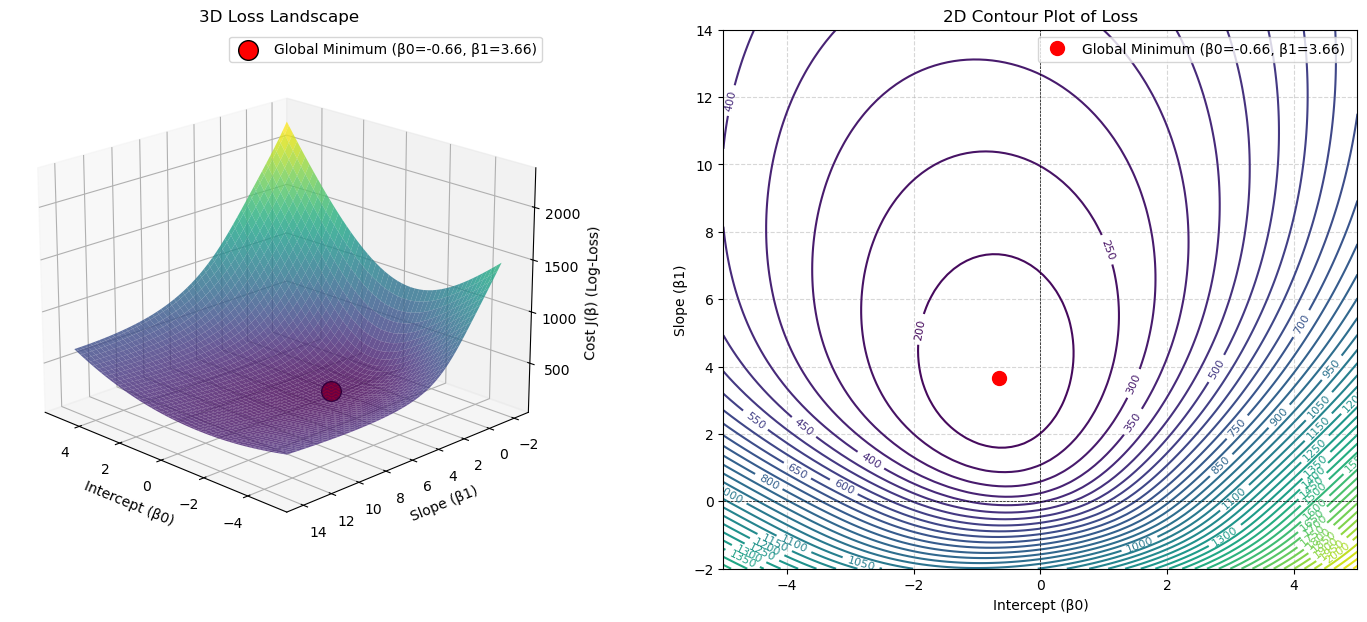

Optimal parameters:
  β0 (Intercept): -0.6566
  β1 (Slope):       3.6566
  Minimum Cost (Log-Loss): 165.0107


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D # Moved import to top

# --- 1. Load and Prepare Data ---
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
X_df = breast_cancer_wisconsin_diagnostic.data.features 
y_df = breast_cancer_wisconsin_diagnostic.data.targets 
data = X_df.join(y_df)

# Map Diagnosis to 0 (Benign) and 1 (Malignant)
data['Diagnosis'] = data['Diagnosis'].replace({'B':0,'M':1})

# Extract our 1D feature and target
X = data[['radius1']].values
y = data['Diagnosis'].values

# --- 2. CRITICAL STEP: Scale the Feature ---
# This is vital for visualization. Without it, the "bowl"
# will be extremely stretched and impossible to see.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def compute_cost(X, y, beta_0, beta_1):
    """
    Calculates the total log-loss for a given beta_0 and beta_1.
    """
    # 1. Calculate the linear part (z)
    # --- THIS IS THE FIX ---
    # We .flatten() X to make it (n,) to match y's shape (n,)
    z = beta_0 + (X.flatten() * beta_1)
    # ----------------------
    
    # 2. Apply the sigmoid function to get probabilities (p_hat)
    p_hat = 1 / (1 + np.exp(-z)) # p_hat is now shape (n,)
    
    # --- Numerical Stability ---
    # We must "clip" values to prevent log(0) or log(1-1), 
    # which would result in -inf.
    epsilon = 1e-10
    p_hat = np.clip(p_hat, epsilon, 1 - epsilon)
    # -------------------------
    
    # 3. Calculate the log-loss for each sample
    # y (n,) and p_hat (n,) will now multiply element-wise
    cost_per_sample = -(y * np.log(p_hat) + (1 - y) * np.log(1 - p_hat))
    
    # 4. Return the *total* cost for the whole dataset
    return np.sum(cost_per_sample)

# 1. Create ranges for Beta 0 (intercept) and Beta 1 (slope)
beta_0_range = np.linspace(-5, 5, 100)
# --- UPDATED as requested ---
beta_1_range = np.linspace(-2, 14, 100)
# --------------------------

# 2. Create the 2D grid
B0, B1 = np.meshgrid(beta_0_range, beta_1_range)
costs = np.zeros_like(B0)

# 3. Calculate the cost for every point on the grid
for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        costs[i, j] = compute_cost(X_scaled, y, B0[i, j], B1[i, j])

# Find the minimum for plotting
min_cost_idx = np.unravel_index(np.argmin(costs), costs.shape)
best_b0 = B0[min_cost_idx]
best_b1 = B1[min_cost_idx]
min_cost = costs[min_cost_idx]

# --- Create the Plot ---
fig = plt.figure(figsize=(18, 7))

# --- Subplot 1: 3D Surface Plot ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(B0, B1, costs, cmap='viridis', alpha=0.8)
# --- UPDATED to show both optimal parameters ---
ax1.scatter(best_b0, best_b1, min_cost, color='red', s=200, 
            edgecolor='black', label=f'Global Minimum (β0={best_b0:.2f}, β1={best_b1:.2f})')
# ---------------------------------------------
ax1.set_xlabel('Intercept (β0)')
ax1.set_ylabel('Slope (β1)')
ax1.set_zlabel('Cost J(β) (Log-Loss)')
ax1.set_title('3D Loss Landscape')
ax1.view_init(elev=20, azim=135) # Adjust angle
ax1.legend()

# --- Subplot 2: 2D Contour Plot ---
ax2 = fig.add_subplot(1, 2, 2)
contours = ax2.contour(B0, B1, costs, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# --- UPDATED to show both optimal parameters ---
ax2.plot(best_b0, best_b1, 'ro', markersize=10, 
         label=f'Global Minimum (β0={best_b0:.2f}, β1={best_b1:.2f})')
# ---------------------------------------------
ax2.set_xlabel('Intercept (β0)')
ax2.set_ylabel('Slope (β1)')
ax2.set_title('2D Contour Plot of Loss')
ax2.axhline(0, color='k', ls='--', lw=0.5)
ax2.axvline(0, color='k', ls='--', lw=0.5)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)

plt.show()

print(f"Optimal parameters:")
print(f"  β0 (Intercept): {best_b0:.4f}")
print(f"  β1 (Slope):       {best_b1:.4f}")
print(f"  Minimum Cost (Log-Loss): {min_cost:.4f}")

The plots clearly show a single, smooth, **convex "bowl"**.
* There are no "local minima" or "bumpy" areas for an optimizer to get stuck in.
* This is why we were told the logistic regression cost function **is convex**.
* The **red dot** at the very bottom of this bowl represents the *one* optimal set of parameters ($\beta_0, \beta_1$) that minimizes the cost.

An iterative solver like **Gradient Descent** is guaranteed to find this minimum, just like a marble released from anywhere on the bowl's rim is guaranteed to roll to the bottom.

## Statistical Interpretation of the Coefficients of a Linear Regressor

Let's now see how to interpret the coefficients of a logistic regressor. 

### Interpretation of the intercept $\beta_0$
Remember that the regression model (in the case of simple logistic regression) is as follows:

$$
\log(\frac{p}{1-p})=\beta_0 + \beta_1 x
$$

Applying what we know about logistic regressors, we can write:

$$
x=0 \Rightarrow \log \frac{p}{1-p}={\beta}_0
$$

To have a clearer picture, we can exponentiate both sides of the equation and write: 

$$x=0 \Rightarrow \frac{p}{1-p}=e^{\beta_0}$$

Remember that $\frac{p}{1-p}$ is the odd that the dependent variable is equal to 1 when observing $x$ and, as such, it has a clear interpretation. For example, if the odds of an event are $\frac{3}{1}$, then it is $3$ times more likely to occur than not to occur. So, **for $x=0$, it is $e^{\beta_0}$ times more likely that the dependent variable is equal to 1, rather than being equal to 0**.

### Interpretation of variable coefficients $\beta_i$
We know that:

$$odds(p|x) = \frac{P(y=1|x)}{1-P(y=1|x)}$$

We can write:

$$
\log odds(p|x) = \beta_0 + \beta_1 x
$$

Hence:

$$\log odds(p|x+1) - \log odds(p|x) = \beta_0 + \beta_1 (x+1) - \beta_0 - \beta_1 x = \beta_1 (x+1) - \beta_1 x = \beta_1$$

Exponentiating both sides, we get:

$$e^{\log odds(p|x+1) - \log odds(p|x)} = e^{\beta_1} \Rightarrow \frac{e^{\log odds(p|x+1)}}{e^{\log odds(p|x)}} = e^{\beta_1} \Rightarrow \frac{odds(p|x+1)}{odds(p|x)} = e^{\beta_1} \Rightarrow odds(p|x+1) = e^{\beta_1}odds(p|x)$$

We can thus say that **increasing the variable $x$ by one unit corresponds to a multiplicative increase in odds by $e^{\beta_1}$**.

This analysis can be easily extended to the case of a multiple logistic regressor. Hence in general, given the model:

$$P(y=1|\mathbf{x}) = \sigma(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n)$$

We can say that:

* $e^{\beta_0}$ is the odd of $y$ being equal to $1$ rather than $0$ when $x_i=0, \ \forall i$;
* An increment of one unit in the independent variable $x_i$ corresponds to a multiplicative increment of $e^{\beta_i}$ in the odds of $y=1$. So if $e^{\beta_i}=0.05$, then $y=1$ is $5\%$ more likely for a one-unit increment of $x$.

## Example of Logistic Regression

Let us now apply logistic regression to a larger set of variables in our regression problem. We will consider the following independent variables:
* `radius1`
* `texture1`
* `perimeter1`
* `area1`
* `smoothness1`
* `compactness1`
* `concavity1`
* `symmetry1`

The dependent variable is again `Diagnosis`.

Once fit to the data, we will obtain the following parameters:

|$R^2$|Adj. $R^2$|F-statistic|Prob(F-statistic)|Log-Likelihood|
|-|-|-|-|-|
|0.670|0.666|142.4|1.16e-129|-78.055|

All values have interpretations similar to the ones obtained in the case of linear regression. The Log-Likelihood reports the value of the logarithm of the likelihood which was used to train the data.

The estimates for the coefficients are as follows:

In [ ]:
ols("Diagnosis ~ radius1 + texture1 + perimeter1 + area1 + smoothness1 + compactness1 + concavity1 + symmetry1",data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.6591,0.224,-11.896,0.000,-3.098,-2.220
radius1,0.4688,0.133,3.532,0.000,0.208,0.730
texture1,0.0219,0.003,7.376,0.000,0.016,0.028
perimeter1,-0.0473,0.021,-2.272,0.023,-0.088,-0.006
area1,-0.0009,0.000,-3.985,0.000,-0.001,-0.000
smoothness1,5.1389,1.221,4.208,0.000,2.740,7.538
compactness1,0.3080,0.854,0.360,0.719,-1.370,1.986
concavity1,2.0973,0.414,5.065,0.000,1.284,2.911
symmetry1,1.2739,0.568,2.244,0.025,0.159,2.389


We notice that not all variables have a statistically relevant relationship with the dependent variable. Applying backward elimination, we remove `compactness1` and obtain the following estimates:

In [ ]:
ols("Diagnosis ~ radius1 + texture1 + perimeter1 + area1 + smoothness1 + concavity1 + symmetry1",data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.6708,0.221,-12.086,0.000,-3.105,-2.237
radius1,0.4360,0.097,4.517,0.000,0.246,0.626
texture1,0.0219,0.003,7.405,0.000,0.016,0.028
perimeter1,-0.0419,0.014,-2.915,0.004,-0.070,-0.014
area1,-0.0010,0.000,-4.477,0.000,-0.001,-0.001
smoothness1,5.3093,1.125,4.719,0.000,3.099,7.519
concavity1,2.1479,0.389,5.517,0.000,1.383,2.913
symmetry1,1.3132,0.557,2.359,0.019,0.220,2.407


These are now all statistically relevant. For instance, we can see that:
* When all variables are set to zero, the odds of the benign tumor are $e^{-2.6708} \approx 0.07$, or $\frac{7}{100}$. This is a base value.
* An increment in one unit of `texture1` increments the odds of a benign tumor multiplicatively by a factor of $e^{0.0219} \approx 1.02$ (a +$2\%$), when all other variables are constant.
* An increment of one unit of `perimeter1` decrements the odds of benign tumor multiplicatively by a factor of $e^{-0.0419} \approx 0.96$ (a -$4\%$), when all other variables are constant.

## Evaluating the Logistic Regression Model

The `statsmodels` summary table gives us a lot of information, including a value for `R-squared`. It's critical to understand that this is **NOT** the same $R^2$ we used in linear regression.

### The Problem: We Can't Use $R^2$
In OLS (Linear Regression), $R^2 = 1 - \frac{RSS}{TSS}$. This metric is based on minimizing the *sum of squared residuals* (RSS).

In Logistic Regression, our model does not predict a continuous value. It predicts a *probability*. We don't minimize squared residuals; we minimize the **negative log-likelihood** (also called **Cross-Entropy Loss**).

Because the underlying cost function is different, the $R^2$ metric is not mathematically valid. A model that predicts a probability of `0.9` for an event that happens (`y=1`) is a *fantastic* prediction, but it would have a "residual" of $(1 - 0.9) = 0.1$, which OLS would want to square and "punish." This doesn't make sense.

### The Solution: "Pseudo $R^2$"

To get a similar "0-to-1" metric for *goodness-of-fit*, statisticians have developed several **"Pseudo $R^2$"** measures. The one `statsmodels` reports by default is **McFadden's $R^2$**.

The logic is the same as OLS $R^2$: "How much better is our model than a 'dumb' baseline?"

* **In OLS:** We compared our model's error ($RSS$) to the baseline's error ($TSS$).
* **In Logistic Regression:** We compare our model's **Log-Likelihood** to a baseline model's Log-Likelihood.

1.  **Baseline Model (Log-Likelihood Null, $LL_{Null}$):**
    A "dumb" model that only knows the *prior* (e.g., $P(y=1) = 0.35$). This is an "intercept-only" model. `statsmodels` calculates this for you.

2.  **Our "Full" Model (Log-Likelihood, $LL_{Model}$):**
    This is the log-likelihood of our *fitted* model. It will be a "less negative" (better) number than $LL_{Null}$.

**McFadden's $R^2$** is then defined as:

$$
R^2_{McFadden} = 1 - \frac{LL_{Model}}{LL_{Null}}
$$

**Interpretation:**
* **$LL_{Model}$** is the value reported as "Log-Likelihood" in your summary table.
* **$LL_{Null}$** is reported as "LL-Null".
* **`Pseudo R-sq.`:** This is the $R^2_{McFadden}$ score.

Consider the following example:
* `Log-Likelihood: -105.19` ($LL_{Model}$)
* `LL-Null: -452.39` ($LL_{Null}$)
* `Pseudo R-sq.: 0.77`

This `0.77` was calculated as $1 - (\frac{-105.19}{-452.39}) \approx 0.77$.

It is interpreted similarly to $R^2$: "Our model's features explain about **77%** of the 'deviance' (uncertainty) in the outcome, compared to a model that just guesses the average."

**Important:** You cannot compare a `Pseudo R-sq.` from logistic regression to an $R^2$ from OLS. They are not equivalent. It is only useful for comparing *nested* logistic regression models (like we do in backward elimination).

### Predictive Evaluation
When we use the model in a purely predictive way, we can also use all evaluation measures we have seen for predictive analysis, such as accuracy, precision, recall, F1, confusion matrix etc.

## Logistic Regression in Python
Let's look at an example of logistic regression in Python. We will use the R dataset `biopsy`. We can load it using `statsmodels`:

In [9]:
from statsmodels.datasets import get_rdataset
biopsy = get_rdataset('biopsy',package='MASS')
print(biopsy.__doc__)

.. container::

   .. container::

      ====== ===============
      biopsy R Documentation
      ====== ===============

      .. rubric:: Biopsy Data on Breast Cancer Patients
         :name: biopsy-data-on-breast-cancer-patients

      .. rubric:: Description
         :name: description

      This breast cancer database was obtained from the University of
      Wisconsin Hospitals, Madison from Dr. William H. Wolberg. He
      assessed biopsies of breast tumours for 699 patients up to 15 July
      1992; each of nine attributes has been scored on a scale of 1 to
      10, and the outcome is also known. There are 699 rows and 11
      columns.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         biopsy

      .. rubric:: Format
         :name: format

      This data frame contains the following columns:

      ``ID``
         sample code number (not unique).

      ``V1``
         clump thickness.

      ``V2``
         uniformity of cell size.

      ``V3``

The dataset contains $699$ observations and $11$ columns. Each observation contains measurements of $9$ quantities relating to tissue samples that can be "benign" or "malignant" tumors. Let's start by manipulating the data a bit. We visualize the values of the `class` variable:

In [10]:
biopsy.data['class'].unique()

array(['benign', 'malignant'], dtype=object)

To calculate the logistic regression model using statsmodels, it is necessary to convert these values into integers ($0$ or $1$). Furthermore, it is advisable to avoid calling the column `class` as this is a reserved word for statsmodels. We build a new column `cl` that contains the modified `class` values:

In [12]:
biopsy.data['cl'] = biopsy.data['class'].replace({'benign':0, 'malignant':1})

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_63863/663777289.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  biopsy.data['cl'] = biopsy.data['class'].replace({'benign':0, 'malignant':1})


We will use the `logit` object form statsmodels:

In [14]:
from statsmodels.formula.api import logit
model = logit('cl ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9',biopsy.data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.075321
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     cl   No. Observations:                  683
Model:                          Logit   Df Residuals:                      673
Method:                           MLE   Df Model:                            9
Date:                Sat, 15 Nov 2025   Pseudo R-squ.:                  0.8837
Time:                        16:22:35   Log-Likelihood:                -51.444
converged:                       True   LL-Null:                       -442.18
Covariance Type:            nonrobust   LLR p-value:                2.077e-162
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1039      1.175     -8.600      0.000     -12.407      -7.801
V1             0.5350      0.142      3.767      0.000       0.257       0.813
V2            -0.0063      0.209     -0.030      0.976      -0.416       0.404
V3             0.3227      0.231      1.399      0.162      -0.129       0.775
V4             0.3306      0.123      2.678      0.007       0.089       0.573
V5             0.0966      0.157      0.617      0.537      -0.210       0.404
V6             0.3830      0.094      4.082      0.000       0.199       0.567
V7             0.4472      0.171      2.609      0.009       0.111       0.783
V8             0.2130      0.113      1.887      0.059      -0.008       0.434
V9             0.5348      0.329      1.627      0.104      -0.110       1.179
==============================================================================
"""

The logistic regressor explains the relationship between variables well ($R^2$ high) and is significant (p-value almost zero). Some coefficients have a high p-value. Let's start by eliminating the variable `V2`, which has the highest p-value:

In [15]:
model = logit('cl ~ V1 + V3 + V4 + V5 + V6 + V7 + V8 + V9',biopsy.data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.075321
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     cl   No. Observations:                  683
Model:                          Logit   Df Residuals:                      674
Method:                           MLE   Df Model:                            8
Date:                Sat, 15 Nov 2025   Pseudo R-squ.:                  0.8837
Time:                        16:22:54   Log-Likelihood:                -51.445
converged:                       True   LL-Null:                       -442.18
Covariance Type:            nonrobust   LLR p-value:                2.036e-163
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0976      1.155     -8.739      0.000     -12.362      -7.833
V1             0.5346      0.141      3.784      0.000       0.258       0.811
V3             0.3182      0.174      1.826      0.068      -0.023       0.660
V4             0.3299      0.121      2.723      0.006       0.092       0.567
V5             0.0961      0.156      0.618      0.537      -0.209       0.401
V6             0.3831      0.094      4.082      0.000       0.199       0.567
V7             0.4465      0.170      2.628      0.009       0.114       0.779
V8             0.2125      0.112      1.902      0.057      -0.006       0.432
V9             0.5341      0.328      1.630      0.103      -0.108       1.176
==============================================================================
"""

We proceed by removing `V5`, which has a p-value of $0.537$:

In [16]:
model = logit('cl ~ V1 + V3 + V4 + V6 + V7 + V8 + V9',biopsy.data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.075598
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     cl   No. Observations:                  683
Model:                          Logit   Df Residuals:                      675
Method:                           MLE   Df Model:                            7
Date:                Sat, 15 Nov 2025   Pseudo R-squ.:                  0.8832
Time:                        16:22:56   Log-Likelihood:                -51.633
converged:                       True   LL-Null:                       -442.18
Covariance Type:            nonrobust   LLR p-value:                2.240e-164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9828      1.126     -8.865      0.000     -12.190      -7.776
V1             0.5340      0.141      3.793      0.000       0.258       0.810
V3             0.3453      0.172      2.012      0.044       0.009       0.682
V4             0.3425      0.119      2.873      0.004       0.109       0.576
V6             0.3883      0.094      4.150      0.000       0.205       0.572
V7             0.4619      0.168      2.746      0.006       0.132       0.792
V8             0.2261      0.111      2.037      0.042       0.009       0.444
V9             0.5312      0.324      1.637      0.102      -0.105       1.167
==============================================================================
"""

We remove `V9`, which has a p-value greater than $0.05$:

In [17]:
model = logit('cl ~ V1 + V3 + V4 + V6 + V7 + V8',biopsy.data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.078436
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     cl   No. Observations:                  683
Model:                          Logit   Df Residuals:                      676
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Nov 2025   Pseudo R-squ.:                  0.8788
Time:                        16:22:57   Log-Likelihood:                -53.572
converged:                       True   LL-Null:                       -442.18
Covariance Type:            nonrobust   LLR p-value:                1.294e-164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.7671      1.085     -9.001      0.000     -11.894      -7.640
V1             0.6225      0.137      4.540      0.000       0.354       0.891
V3             0.3495      0.165      2.118      0.034       0.026       0.673
V4             0.3375      0.116      2.920      0.004       0.111       0.564
V6             0.3786      0.094      4.035      0.000       0.195       0.562
V7             0.4713      0.166      2.837      0.005       0.146       0.797
V8             0.2432      0.109      2.240      0.025       0.030       0.456
==============================================================================
"""

All coefficients now have an acceptable p-value. Let's proceed to the analysis of the coefficients. We calculate the exponentials:

In [18]:
np.exp(model.params)

Intercept    0.000057
V1           1.863641
V3           1.418374
V4           1.401487
V6           1.460166
V7           1.602133
V8           1.275287
dtype: float64

* The near-zero value of the exponential of the intercept indicates that, when all variables take zero values, the odds are very low. This suggests that $p$ is low, while $1-p$ is very high. The probability of having a malignant tumor is therefore very low if all variables take zero values;
 * An increase of one unit in the value of `V1` corresponds to an increase of approximately $86\%$ in the odds, making the possibility of a malignant tumor higher;
 * An increase of one unit in the value of `V3` corresponds to an increase of approximately $41\%$ in the odds;
 * An increase of one unit in the value of `V4` corresponds to an increase of approximately $40\%$ in the odds;
 * An increase of one unit in the value of `V6` corresponds to an increase of approximately $46\%$ in the odds;
 * An increase of one unit in the value of `V7` corresponds to an increase of approximately $60\%$ in the odds;
 * An increase of one unit in the value of `V8` corresponds to an increase of approximately $27\%$ in the odds;
 
The increase of variables generally causes an increase in the odds. Therefore, we expect the values of the variables to be small in the presence of benign tumors.

## References
* Chapter $4$ of \[1\]

\[1\] James, Gareth Gareth Michael. An introduction to statistical learning: with applications in Python, 2023.https://www.statlearning.com